# Overview
- Matrix multiplication is very frequently encountered in many complex algorithms, and thus must be optimized
- This assignment explores usage of `cython`, an integration of C and Python, for the same.
- We explre various transformations for optimization, and compare results
- We also compare the same with matrix multiplication using the `numpy` library
- We find execution times and hence GFLOPS, and compare with processor frequency.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

## Step 1

Naive Matrix multiplication code:

In [2]:
def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [3]:
# generating random matrices
mat1 = np.random.rand(10, 10)
mat2 = np.random.rand(10, 10)

In [4]:
# timing the naive matrix multiplication
result_naive = %timeit -o -q matrix_multiply(mat1, mat2)
print(f"Average time taken for naive matrix multiplicaion = {result_naive.average}")

Average time taken for naive matrix multiplicaion = 0.0007579423907445743


In [5]:
# timing the numpy matrix multiplication
result_numpy = %timeit -o -q mat1 @ mat2
print(f"Average time taken for numpy multiplicaion = {result_numpy.average}")

Average time taken for numpy multiplicaion = 2.3388070200702974e-06


For multiplying two N * N matrices, we need to do N computations for multiplying a row and a column. For N rows in the first matrix, and N rows in the second, this results in N<sup>2</sup> computations for each of these, resulting in N<sup>3</sup> multiplications. As there are twice the number of floating point operations as there are number of multiplicationsdue to the additions involved, this results in 2N<sup>3</sup> floating point operations. The number of floating point operations per second can be calculated as follows: \
$$\text{FLOPS} = \frac{\text{Number of Floating Point Operations}}{\text{Time Taken (in s)}}$$
The number of GFLOPS are thus: \
$$\text{GFLOPS} = \frac{\text{FLOPS}}{10^{9}}$$

For the above matrix multiplication, the above calculations result in 2,000 floating point operations. As the `matrix_multiplication` functions takes around 540 micro seconds, the number of floating point operations per seconds would be 3.7 * 10<sup>6</sup>. \
The number of GFLOPS would be 3.7 * 10<sup>-3</sup>

# Step 2

In [6]:
# using the jupyter server specefications 
print(f"CPU frequency is 2099.998 MHz")
print(f"Theoretical value of GFLOPS is {round(2099.998 / 10**3, 3)}")

CPU frequency is 2099.998 MHz
Theoretical value of GFLOPS is 2.1


In [7]:
# calculating the GFLOPS for the two multiplication methods
GFLOPS_naive = 2 * (10 ** 3) / ((10**9) * result_naive.average)
GFLOPS_numpy = 2 * (10 ** 3) / ((10**9) * result_numpy.average)

print(f"GFLOPS for naive multiplication is {round(GFLOPS_naive, 3)}")
print(f"GFLOPS for numpy multiplication is {round(GFLOPS_numpy, 3)}")

GFLOPS for naive multiplication is 0.003
GFLOPS for numpy multiplication is 0.855


- Upon using `lscpu` in the jupyter terminal, we get the CPU frequency of 2099.998MHz, translating to around 2.1 GFLOPS
- GFLOPS for naive multiplication returned when running the above cell was `0.002`, while that for numpt multiplication was  `0.446`
- Thus, the ratio of the CPU GFLPOS and that for naive multiplication is `1,050`, while for numpy multiplication is `4.77`.

# Step 3

Over here, we go along with the assumption that numpy multiplication has no algorithm optimization, simply other same and return optimizations. Improvements in algorithm would most definitely result in lesser required calculations, and changes in GFLOPS values.
Technically, GFLOPS is a characteristic of the processor, and thus should be a constant, but due to insufficient hardware optimization, or optimizations such as parallel core processing, GFLOPS varies with size.

The time taken in iteration 1 = 4.09779604524374e-05s
The time taken in iteration 2 = 2.5987974368035793e-05s
The time taken in iteration 3 = 0.00012069696094840765s
The time taken in iteration 4 = 0.029620857094414532s
The time taken in iteration 5 = 0.022900548996403813s
The time taken in iteration 6 = 0.019595148041844368s
The time taken in iteration 7 = 0.05513379396870732s
The time taken in iteration 8 = 0.13886521197855473s
The time taken in iteration 9 = 0.8369472729973495s
The time taken in iteration 10 = 8.335401260992512s


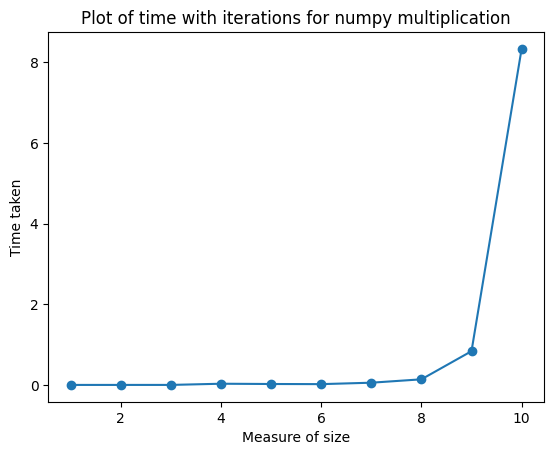

In [8]:
import matplotlib.pyplot as plt
x_numpy = []
y_numpy = []
gflops_numpy = []

# using a loop to keep doubling the size of matrices, and timing numpy multiplication in each, and plotting it out
for i in range (10):
    mat1 = np.random.rand(10 * (2 ** i), 10 * (2 ** i))
    mat2 = np.random.rand(10 * (2 ** i), 10 * (2 ** i))
    result = %timeit -o -q -r 1 -n 1  mat1 @ mat2
    print(f"The time taken in iteration {i+1} = {result.average}s")
    gflops = (2 * (10 * (2 ** i))**3)/(result.best*1e9)
    x_numpy.append(i+1)
    y_numpy.append(result.average)
    gflops_numpy.append(gflops)
x_numpy = np.array(x_numpy)
y_numpy = np.array(y_numpy)
gflops_numpy = np.array(gflops_numpy)

# making the desired plot
plt.plot(x_numpy, y_numpy, marker = 'o')
plt.title("Plot of time with iterations for numpy multiplication")
plt.xlabel("Measure of size")
plt.ylabel("Time taken")
plt.show()

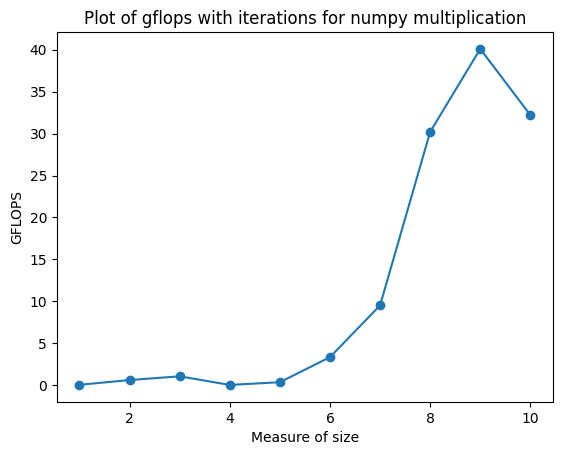

In [9]:
# making the desired plot
plt.clf()
plt.plot(x_numpy, gflops_numpy, marker = 'o')
plt.title("Plot of gflops with iterations for numpy multiplication")
plt.xlabel("Measure of size")
plt.ylabel("GFLOPS")
plt.show()

The time taken in iteration 1 = 0.0006481439340859652s
The time taken in iteration 2 = 0.00927198794670403s
The time taken in iteration 3 = 0.10100654303096235s
The time taken in iteration 4 = 0.4225255419733003s
The time taken in iteration 5 = 3.6075557329459116s


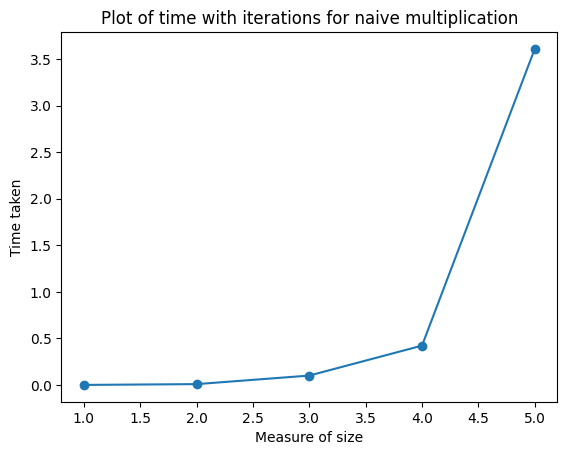

In [10]:
x_naive = []
y_naive = []
gflops_naive = []

# using a loop to keep doubling the size of matrices, and timing naive multiplication in each, and plotting it out
for i in range (5):
    mat1 = np.random.rand(10 * (2 ** i), 10 * (2 ** i))
    mat2 = np.random.rand(10 * (2 ** i), 10 * (2 ** i))
    gflops = (2 * (10 * (2 ** i))**3)/(result.best*1e9)
    result = %timeit -o -q -r 1 -n 1 matrix_multiply(mat1, mat2)
    print(f"The time taken in iteration {i+1} = {result.average}s")
    x_naive.append(i+1)
    y_naive.append(result.average)
    gflops_naive.append(gflops)
x_naive = np.array(x_naive)
y_naive = np.array(y_naive)
gflops_naive = np.array(gflops_naive)

# making the desired plot
plt.clf()
plt.plot(x_naive, y_naive, marker = 'o')
plt.title("Plot of time with iterations for naive multiplication")
plt.xlabel("Measure of size")
plt.ylabel("Time taken")
plt.show()

In the above codes, we use the limits after trial and error, stopping iterations as soon as the execution time goes into seconds. The exponentially increasing nature of the execution time thus might hang the notebook if the bounds are not set properly

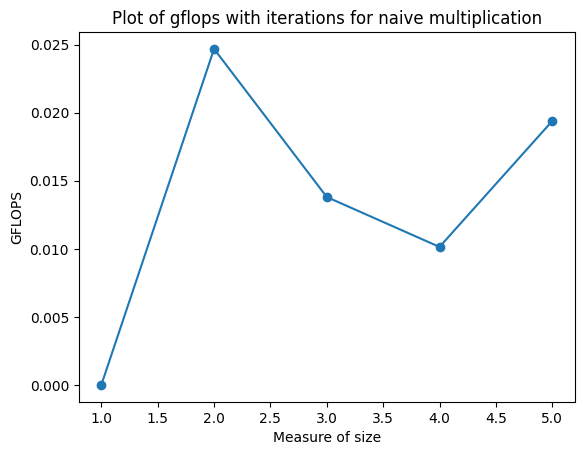

In [11]:
# making the desired plot
plt.clf()
plt.plot(x_naive, gflops_naive, marker = 'o')
plt.title("Plot of gflops with iterations for naive multiplication")
plt.xlabel("Measure of size")
plt.ylabel("GFLOPS")
plt.show()

The very high values of GFLOPS for numpy multiplication is due to the optimization in algorithms that have been implemented. 

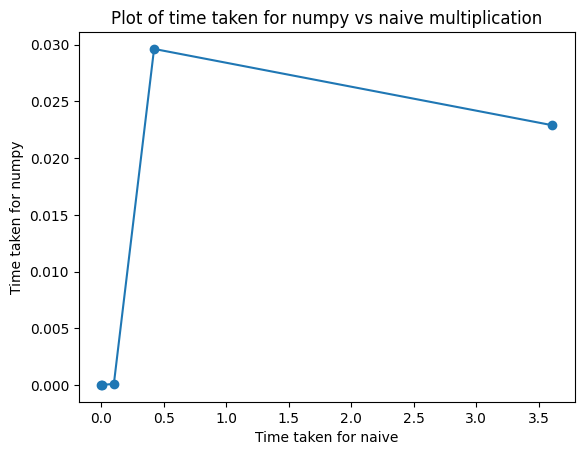

In [12]:
plt.clf()
plt.plot(y_naive, y_numpy[0:5], marker = 'o')
plt.title("Plot of time taken for numpy vs naive multiplication")
plt.xlabel("Time taken for naive")
plt.ylabel("Time taken for numpy")
plt.show()

# Step 4

Now we use `cython`, a mixture of C and Python, to try and optimize the matrix multiplication function further. \
It makes the language compiled instead of interpreted, as well as removes the need for typecasting.

In [13]:
%load_ext Cython

In [14]:
%%cython -a
import numpy as np
import cython

# a basic cython function without any optimization
def cy_matmul_base(u, v):
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [15]:
# timing the above multiplication
u = np.array(np.random.random((50,50)))
v = np.array(np.random.random((50,50)))
%timeit cy_matmul_base(u, v)

81.1 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Evidently this code is not very well optimized, and can be improved further

# Step 5

#### Transformation 1
Here, we include integer declarations for the variables

In [16]:
%%cython -a
import numpy as np

# rewriting the above code with integer declarations for variables
def cy_matmul_1(u, v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [17]:
# timing the above code
u = np.array(np.random.random((50,50)))
v = np.array(np.random.random((50,50)))
%timeit cy_matmul_1(u, v)

88.3 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


This does not affect the performance too much

#### Transformation 2
Over here, we disable the Python bound checker

In [18]:
%%cython -a
import numpy as np
import cython

# disabling the Python bound checker
@cython.boundscheck(False)
def cy_matmul_2(u, v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

The decorator `@cython.boundscheck(False)` is used to disable the bound checking in arrays and pointer accesses. Although it makes the code much faster, we lose out on safety in case the code accidentally accesses some unintended memory. Thus, it must be used only when we are sure about the correctness of the code.

In [19]:
u = np.array(np.random.random((50,50)))
v = np.array(np.random.random((50,50)))
%timeit cy_matmul_2(u, v)

82.5 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Transformation 3
Over here, we declare double data types for the passed in matrices

In [20]:
%%cython -a
import numpy as np
import cython

@cython.boundscheck(False)
def cy_matmul_3(double[:,:] u, double[:,:] v):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [21]:
u = np.double(np.random.random((50,50)))
v = np.double(np.random.random((50,50)))
%timeit cy_matmul_3(u, v)

40.6 ms ± 8.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Transformation 4
Over here, we further pass in the result matrix instead of initializing it within the function

In [22]:
%%cython -a
import numpy as np
import cython

@cython.boundscheck(False)
def cy_matmul_4(double[:,:] u, double[:,:] v, double[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [23]:
u = np.double(np.random.random((50,50)))
v = np.double(np.random.random((50,50)))
res = np.zeros((50, 50), dtype=np.double)
%timeit cy_matmul_4(u, v, res)

213 µs ± 37 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### Transformation 5
Over here, we convert double to float data types.

In [24]:
%%cython -a
import numpy as np
import cython

@cython.boundscheck(False)
def cy_matmul_5(float[:,:] u, float[:,:] v, float[:,:] res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res

In [25]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
res = np.zeros((50, 50), dtype=np.float32)
%timeit cy_matmul_5(u, v, res)

203 µs ± 64.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
%timeit u @ v

31.2 µs ± 9.17 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Evidently, the maximum improvement occurs when we pass in the result matrix instead of initializing it within the function. This is because it takes time and space to do this, and doing that outside the function requires the function to do lesser work, thus optimizing the time it takes. \
But, we also see that the numpy multiplication is still perorming very well in comparison to the optimized `cython` code. This is because the `numpy` library is algorithmically very well optimized, and also hardware optimized. Thus, it is well suited for matrix multiplication.

# Conclusions
- Evidently, `cython` optimizations help in converting the interpreted Python code to compiled C code, as well as removing the need for typecasting, thus optimizing execution time.
- Passing in the result matrix, and changing datatypes of various variables also sped up the code.
- Yet, due to algorithm and hardware optimizations, as well as better CPU usage and cache usage, we see very good results from the `numpy` matrix multiplication